# Travelling Salesperson Peroblem

... some motivational funny text

The content in this notebook is structured into 4 major parts:

#### 1. The Challenge

#### 2. The Distances from Google Maps API

#### 3. The TSP-solving using Branch-and-Bound

#### 4. The Result

-------------------------

## 1. The Challenge

In [1]:
# Staples of python projects
import pandas as pd
import numpy as np

# Needed for calling the Google Distance Matrix API
import requests

# Needed for modelling the state space graph during the Branch-and-Bound algorithm
import networkx as nx

In [2]:
cities = pd.read_csv("msg_standorte_deutschland.csv")
cities

,Nummer,msg Standort,Straße,Hausnummer,PLZ,Ort,Breitengrad,Längengrad
0,1,Ismaning/München (Hauptsitz),Robert-Bürkle-Straße,1,85737,Ismaning,48.229035,11.686153
1,2,Berlin,Wittestraße,30,13509,Berlin,52.580911,13.293884
2,3,Braunschweig,Mittelweg,7,38106,Braunschweig,52.278748,10.524797
3,4,Bretten,Edisonstraße,2,75015,Bretten,49.032767,8.698372
4,5,Chemnitz,Zwickauer Straße,16a,9122,Chemnitz,50.829383,12.914737
5,6,Düsseldorf,Gladbecker Straße,3,40472,Düsseldorf,51.274774,6.794912
6,7,Essen,Am Thyssenhaus,1.3,45128,Essen,51.450577,7.008871
7,8,Frankfurt,Mergenthalerallee,73-75,65760,Eschborn,50.136479,8.570963
8,9,Görlitz,Melanchthonstraße,19,2826,Görlitz,51.145511,14.970028
9,10,Hamburg,Dammtorwall,7a,20354,Hamburg,53.557577,9.986065


-------------------------

## 2. The Distances from Google Maps API

In [146]:
# Setting up a dataframe for the distance matrix
all_cities = cities["msg Standort"].values
number_of_cities = len(all_cities)
zero_matrix = np.zeros((number_of_cities,number_of_cities), dtype = int)
distance_matrix = pd.DataFrame(data = zero_matrix, index = all_cities, columns = all_cities)
duration_matrix = distance_matrix.copy()
distance_matrix

,Ismaning/München (Hauptsitz),Berlin,Braunschweig,Bretten,Chemnitz,Düsseldorf,Essen,Frankfurt,Görlitz,Hamburg,...,Ingolstadt,Köln/Hürth,Lingen (Ems),Münster,Nürnberg,Passau,Schortens/Wilhelmshaven,St. Georgen,Stuttgart,Walldorf
Ismaning/München (Hauptsitz),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berlin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Braunschweig,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bretten,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chemnitz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Düsseldorf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Essen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Frankfurt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Görlitz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hamburg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# The key to the google directions API is stored locally on my harddrive.
# Because it is linked to an account with my credit card information, I will not make it public in this notebook.
# If you want to run the entire code yourself, you would need to insert your own google API key here.
# This tutorial explains how to get a key: 
# https://developers.google.com/maps/premium/apikey/distance-matrix-apikey
api_key = open("google_api_key.txt", "r").read(39)

In [148]:
# Build a function that gets a name of a msg company location and returns the coordinates as a string in the needed format

def get_city_coordinates(cityname):
    # Get the line from the imported csv file
    row = cities[cities["msg Standort"] == cityname]
    
    # The degrees need to be rounded to 6 decimal digits.
    coordinates = str(np.round(row["Breitengrad"].values[0], 6)) + "," + str(np.round(row["Längengrad"].values[0], 6))
    return coordinates

get_city_coordinates("Ismaning/München (Hauptsitz)")

'48.229035,11.686153'

In [149]:
coordinate_dict = dict()
for location in all_cities:
    coordinate_dict[location] = get_city_coordinates(location)
coordinate_dict

{'Ismaning/München (Hauptsitz)': '48.229035,11.686153',
 'Berlin': '52.580911,13.293884',
 'Braunschweig': '52.278748,10.524797',
 'Bretten': '49.032767,8.698372',
 'Chemnitz': '50.829383,12.914737',
 'Düsseldorf': '51.274774,6.794912',
 'Essen': '51.450577,7.008871',
 'Frankfurt': '50.136479,8.570963',
 'Görlitz': '51.145511,14.970028',
 'Hamburg': '53.557577,9.986065',
 'Hannover': '52.337987,9.769706',
 'Ingolstadt': '48.784417,11.399106',
 'Köln/Hürth': '50.886726,6.913119',
 'Lingen (Ems)': '52.519154,7.322185',
 'Münster': '51.969304,7.61428',
 'Nürnberg': '49.429596,11.017404',
 'Passau': '48.571989,13.453256',
 'Schortens/Wilhelmshaven': '53.537779,7.936809',
 'St. Georgen': '48.126258,8.325873',
 'Stuttgart': '48.694648,9.161239',
 'Walldorf': '49.295011,8.649036'}

In [150]:
parameters = { 
                "mode": "bicycling",
                "traffic_model": "best_guess",
                "departure_time": "now",
                "key": api_key    
            }

composed url noch netter und python 8 mäßig schreiben

In [151]:
def get_bike_distance(origin, destination_list, parameters):
    base_url = ["https://maps.googleapis.com/maps/api/distancematrix/json?origins=",
                "&destinations=",
                "&mode=",
                "&traffic_model=",
                "&departure_time=",
                "&key="]
    
    origin_coordinates = coordinate_dict[origin]
    destination_coordinates_list = [coordinate_dict[destination] for destination in destination_list]
    destination_coordinates = "|".join(destination_coordinates_list)
    
    composed_url = base_url[0] + origin_coordinates + base_url[1] + destination_coordinates + base_url[2] + parameters["mode"] + base_url[3] + parameters["traffic_model"] + base_url[4] + parameters["departure_time"] + base_url[5] + parameters["key"]
                
    gmaps_response = requests.get(composed_url).json()
    
    return gmaps_response

So, lets make a test call. From Munich to Berlin or to Hamburg.

In [105]:
api_response = get_bike_distance("Ismaning/München (Hauptsitz)", ["Berlin", "Hamburg"], parameters)
api_response

{'destination_addresses': ['Wittestraße 30, 13509 Berlin, Germany',
  'Dammtorwall 7A, 20354 Hamburg, Germany'],
 'origin_addresses': ['Robert-Bürkle-Straße 1, 85737 Ismaning, Germany'],
 'rows': [{'elements': [{'distance': {'text': '623 km', 'value': 622638},
     'duration': {'text': '1 day 9 hours', 'value': 119641},
     'status': 'OK'},
    {'distance': {'text': '742 km', 'value': 741529},
     'duration': {'text': '1 day 15 hours', 'value': 139904},
     'status': 'OK'}]}],
 'status': 'OK'}

The result of the Google Distance API call is a json. 

In [152]:
km_between_cities = int(np.round(api_response['rows'][0]['elements'][0]['distance']['value']/1000))
seconds_between_cities = api_response['rows'][0]['elements'][0]['duration']['value']

print(f"The distance between the locations in Munich and Berlin is {km_between_cities} km.\n\
It takes {seconds_between_cities} seconds to cycle so far.")

The distance between the locations in Munich and Berlin is 99 km.
It takes 19259 seconds to cycle so far.


In [153]:
# Get the list of all msg locations and initialize a list of cities, which are already called by the API as origin
all_cities = cities["msg Standort"].values
called_cities = []

for current_city in all_cities:
    # Mark the current city as called by the API
    called_cities.append(current_city)
    
    # Build the list of all cities, for which the distance needs to be retrieved from the API
    list_of_open_cities = [city for city in all_cities if city not in called_cities]
    
    if len(list_of_open_cities) > 0:
        # Make the api call to get the distance from the current city to all cities, which are uncalled so far
        api_response = get_bike_distance(current_city, list_of_open_cities, parameters)
        
        # Parse through the json result to write the result in the matrices
        for i in range(len(list_of_open_cities)):
            # Get the destination city
            destination_city = list_of_open_cities[i]
            
            # Grab the distance (rounded to km) and the duration (in seconds) from the json, that was returned from the API
            km_between_cities = int(np.round(api_response['rows'][0]['elements'][i]['distance']['value']/1000))
            seconds_between_cities = api_response['rows'][0]['elements'][i]['duration']['value']
            
            # Write the values in the matrices
            distance_matrix.loc[current_city, destination_city] = km_between_cities
            duration_matrix.loc[current_city, destination_city] = seconds_between_cities

# Show the resulting distance matrix
distance_matrix

,Ismaning/München (Hauptsitz),Berlin,Braunschweig,Bretten,Chemnitz,Düsseldorf,Essen,Frankfurt,Görlitz,Hamburg,...,Ingolstadt,Köln/Hürth,Lingen (Ems),Münster,Nürnberg,Passau,Schortens/Wilhelmshaven,St. Georgen,Stuttgart,Walldorf
Ismaning/München (Hauptsitz),0,623,579,288,403,642,673,388,585,742,...,77,591,709,650,169,165,792,311,232,309
Berlin,0,0,237,638,256,578,546,542,238,293,...,594,605,472,467,500,605,454,767,664,636
Braunschweig,0,0,0,492,293,342,310,355,392,173,...,504,369,263,235,409,653,263,622,531,452
Bretten,0,0,0,0,458,361,392,168,637,644,...,246,311,529,467,215,422,667,140,65,39
Chemnitz,0,0,0,0,0,562,540,418,180,441,...,336,545,518,486,271,391,564,579,463,451
Düsseldorf,0,0,0,0,0,0,36,271,740,398,...,579,53,171,118,491,736,309,484,418,322
Essen,0,0,0,0,0,0,0,303,706,365,...,611,85,148,85,523,768,283,516,450,354
Frankfurt,0,0,0,0,0,0,0,0,623,499,...,327,220,352,285,242,487,467,294,210,110
Görlitz,0,0,0,0,0,0,0,0,0,516,...,515,766,656,632,450,570,659,758,642,630
Hamburg,0,0,0,0,0,0,0,0,0,0,...,672,443,244,283,578,822,180,755,686,584


The resulting matrix for the distance has 0-values on the main diagonal, because the distance from a location to itself is 0. The retrieved distances in km from the API are written to the upper triangel.
For simplicity, I assume that the distance are symmetric. Hence, I will sum the matrix with its own transpose.

In [154]:
# Get the underlying array from the pandas data frame
distance_array_upper_triangular = np.array(distance_matrix.values)

# Transpose the array to make get the symmetric lower triangular matrix
distance_array_lower_triangular = distance_array_upper_triangular.T

# Sum the lower and the upper triangular and set this array as the data in the data frame
distance_array = distance_array_upper_triangular + distance_array_lower_triangular
distance_matrix = pd.DataFrame(data = distance_array, index = all_cities, columns = all_cities)
distance_matrix

,Ismaning/München (Hauptsitz),Berlin,Braunschweig,Bretten,Chemnitz,Düsseldorf,Essen,Frankfurt,Görlitz,Hamburg,...,Ingolstadt,Köln/Hürth,Lingen (Ems),Münster,Nürnberg,Passau,Schortens/Wilhelmshaven,St. Georgen,Stuttgart,Walldorf
Ismaning/München (Hauptsitz),0,623,579,288,403,642,673,388,585,742,...,77,591,709,650,169,165,792,311,232,309
Berlin,623,0,237,638,256,578,546,542,238,293,...,594,605,472,467,500,605,454,767,664,636
Braunschweig,579,237,0,492,293,342,310,355,392,173,...,504,369,263,235,409,653,263,622,531,452
Bretten,288,638,492,0,458,361,392,168,637,644,...,246,311,529,467,215,422,667,140,65,39
Chemnitz,403,256,293,458,0,562,540,418,180,441,...,336,545,518,486,271,391,564,579,463,451
Düsseldorf,642,578,342,361,562,0,36,271,740,398,...,579,53,171,118,491,736,309,484,418,322
Essen,673,546,310,392,540,36,0,303,706,365,...,611,85,148,85,523,768,283,516,450,354
Frankfurt,388,542,355,168,418,271,303,0,623,499,...,327,220,352,285,242,487,467,294,210,110
Görlitz,585,238,392,637,180,740,706,623,0,516,...,515,766,656,632,450,570,659,758,642,630
Hamburg,742,293,173,644,441,398,365,499,516,0,...,672,443,244,283,578,822,180,755,686,584


In [155]:
# The exact same needs to be done for the duration matrix. 
duration_array_upper_triangular = np.array(duration_matrix.values)
duration_array_lower_triangular = duration_array_upper_triangular.T
duration_array = duration_array_upper_triangular + duration_array_lower_triangular
duration_matrix = pd.DataFrame(data = duration_array, index = all_cities, columns = all_cities)
duration_matrix

,Ismaning/München (Hauptsitz),Berlin,Braunschweig,Bretten,Chemnitz,Düsseldorf,Essen,Frankfurt,Görlitz,Hamburg,...,Ingolstadt,Köln/Hürth,Lingen (Ems),Münster,Nürnberg,Passau,Schortens/Wilhelmshaven,St. Georgen,Stuttgart,Walldorf
Ismaning/München (Hauptsitz),0,119641,111978,55989,81448,120945,127169,74376,118582,139904,...,15060,111463,137600,126929,32598,30549,149522,62399,45692,60433
Berlin,119641,0,43841,124560,48845,107714,102259,105265,45350,53633,...,115600,113858,85642,86985,96960,121489,82449,152497,130354,122434
Braunschweig,111978,43841,0,94238,56098,64108,58653,68224,73454,31125,...,101771,70252,48667,43430,83131,129247,47800,122636,104668,86431
Bretten,55989,124560,94238,0,92294,67709,73933,31723,129220,121560,...,48016,58227,99220,88147,44051,81074,124360,31458,14491,7376
Chemnitz,81448,48845,56098,92294,0,108707,104278,84082,37121,81159,...,70170,108489,97307,91844,56972,81597,103456,118522,94606,90434
Düsseldorf,120945,107714,64108,67709,108707,0,7048,51015,138403,73876,...,110442,10310,31985,22227,95616,141934,57125,96051,81658,61314
Essen,127169,102259,58653,73933,104278,7048,0,56935,132523,67997,...,116362,16230,28242,16348,101535,147853,51989,101971,87577,67234
Frankfurt,74376,105265,68224,31723,84082,51015,56935,0,120541,94548,...,63283,40797,68496,55907,48015,94333,89982,59998,41500,20508
Görlitz,118582,45350,73454,129220,37121,138403,132523,120541,0,94455,...,107086,143390,119858,116568,93888,118513,120355,155438,131522,127349
Hamburg,139904,53633,31125,121560,81159,73876,67997,94548,94455,0,...,130380,83779,44866,52615,111740,157856,33029,148578,134060,112374


In [156]:
# Save the results of the API calls in csv files
distance_matrix.to_csv('distance_matrix.csv')
duration_matrix.to_csv('duration_matrix.csv')

-------------------------

## 3. The TSP-solving using Branch-and-Bound

In [216]:
# Import the dataframe with the distance between the cities.
adjacency_df = pd.read_csv('distance_matrix.csv', index_col = 0)
adjacency_df

,Ismaning/München (Hauptsitz),Berlin,Braunschweig,Bretten,Chemnitz,Düsseldorf,Essen,Frankfurt,Görlitz,Hamburg,...,Ingolstadt,Köln/Hürth,Lingen (Ems),Münster,Nürnberg,Passau,Schortens/Wilhelmshaven,St. Georgen,Stuttgart,Walldorf
Ismaning/München (Hauptsitz),0,623,579,288,403,642,673,388,585,742,...,77,591,709,650,169,165,792,311,232,309
Berlin,623,0,237,638,256,578,546,542,238,293,...,594,605,472,467,500,605,454,767,664,636
Braunschweig,579,237,0,492,293,342,310,355,392,173,...,504,369,263,235,409,653,263,622,531,452
Bretten,288,638,492,0,458,361,392,168,637,644,...,246,311,529,467,215,422,667,140,65,39
Chemnitz,403,256,293,458,0,562,540,418,180,441,...,336,545,518,486,271,391,564,579,463,451
Düsseldorf,642,578,342,361,562,0,36,271,740,398,...,579,53,171,118,491,736,309,484,418,322
Essen,673,546,310,392,540,36,0,303,706,365,...,611,85,148,85,523,768,283,516,450,354
Frankfurt,388,542,355,168,418,271,303,0,623,499,...,327,220,352,285,242,487,467,294,210,110
Görlitz,585,238,392,637,180,740,706,623,0,516,...,515,766,656,632,450,570,659,758,642,630
Hamburg,742,293,173,644,441,398,365,499,516,0,...,672,443,244,283,578,822,180,755,686,584


In [217]:
# Setting the main diagonal from 0 to infinity
for i in range(adjacency_df.shape[0]):
    adjacency_df.iloc[i,i] = np.inf

# Matrix gets displayed as floating point, because inf is a floating point in IEEE 754
adjacency_matrix = adjacency_df.values
adjacency_matrix

array([[ inf, 623., 579., 288., 403., 642., 673., 388., 585., 742., 583.,
         77., 591., 709., 650., 169., 165., 792., 311., 232., 309.],
       [623.,  inf, 237., 638., 256., 578., 546., 542., 238., 293., 281.,
        594., 605., 472., 467., 500., 605., 454., 767., 664., 636.],
       [579., 237.,  inf, 492., 293., 342., 310., 355., 392., 173.,  62.,
        504., 369., 263., 235., 409., 653., 263., 622., 531., 452.],
       [288., 638., 492.,  inf, 458., 361., 392., 168., 637., 644., 480.,
        246., 311., 529., 467., 215., 422., 667., 140.,  65.,  39.],
       [403., 256., 293., 458.,  inf, 562., 540., 418., 180., 441., 354.,
        336., 545., 518., 486., 271., 391., 564., 579., 463., 451.],
       [642., 578., 342., 361., 562.,  inf,  36., 271., 740., 398., 289.,
        579.,  53., 171., 118., 491., 736., 309., 484., 418., 322.],
       [673., 546., 310., 392., 540.,  36.,  inf, 303., 706., 365., 256.,
        611.,  85., 148.,  85., 523., 768., 283., 516., 450., 354.],

In [235]:
# Define a function to reduce a matrix by subtracting the minimum of each row and column individually.
def reduce_matrix(input_matrix):
    
    # Necessary to use the function without changing the input matrix
    matrix = np.copy(input_matrix)
    
    # Find the minimum in each row (axis 1).
    min_in_rows = np.amin(matrix, axis=1)
    
    # If a row consists only of infinity entries, we change this min to 0.
    # Thereby, no further changes will be applied to this row and it will not be accounted into the costs.
    min_in_rows[min_in_rows == np.inf] = 0
    
    # The minimum for each row will be subtracted from each value in the row.
    # Thereby, at least one value in the row will become 0.
    for i in range(len(min_in_rows)):
         matrix[i] = matrix[i] - min_in_rows[i]
    
    # Find the minimum in each column (axis 0).
    # If the minimum is 0 already, the subtraction will have no effect.
    min_in_cols = np.amin(matrix, axis=0)
    
    # Similar to the min_in_rows, also for the columns the inf will be replaced by 0.
    min_in_cols[min_in_cols == np.inf] = 0
    
    # Again, similar procedure for the columns as for the rows.
    for i in range(len(min_in_cols)):
         matrix[:,i] = matrix[:,i] - min_in_cols[i]
    
    # Calculate the minimum cost for the path as the sum of the subtracted minuma per row and column.
    minimum_cost = np.sum(min_in_rows) + np.sum(min_in_cols)
    
    return matrix, minimum_cost

In [236]:
# Setup a test matrix to compare my function with the theoretical example
test_array = np.array([[np.inf, 20, 30, 10, 11],
                       [15, np.inf, 16, 4, 2],
                       [3, 5, np.inf, 2, 4],
                       [19, 6, 18, np.inf, 3],
                       [16, 4, 7, 16, np.inf]
                      ])

reduce_matrix(test_array)

(array([[inf, 10., 17.,  0.,  1.],
        [12., inf, 11.,  2.,  0.],
        [ 0.,  3., inf,  0.,  2.],
        [15.,  3., 12., inf,  0.],
        [11.,  0.,  0., 12., inf]]), 25.0)

In [237]:
#  Experimenting for the state space graph implementation

class stateNode:
    def __init__(self, current_city, tour, level, minimum_cost, reduced_matrix):
        self.current_city = current_city
        self.tour = tour
        self.level = level
        self.minimum_cost = minimum_cost
        self.reduced_matrix = reduced_matrix

In [264]:
reduced_init_matrix, minimum_cost = reduce_matrix(test_array)

root = stateNode(0, [0], 0, minimum_cost, reduced_init_matrix)
root.reduced_matrix

array([[inf, 10., 17.,  0.,  1.],
       [12., inf, 11.,  2.,  0.],
       [ 0.,  3., inf,  0.,  2.],
       [15.,  3., 12., inf,  0.],
       [11.,  0.,  0., 12., inf]])

In [266]:
root

In [267]:
G = nx.Graph()
G.add_node(0, current_city = 0, tour = [0])
G.add_node(1, node = root)

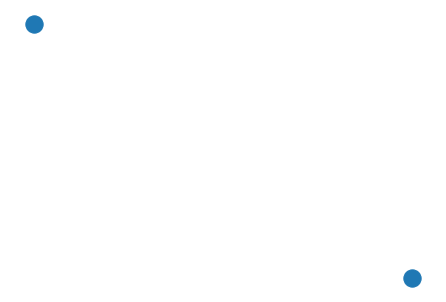

In [270]:
nx.draw(G)

In [283]:
# Try to access the node object again. Works. But perhaps unnessecassary overhead
G.nodes[1]["node"].reduced_matrix

array([[inf, 10., 17.,  0.,  1.],
       [12., inf, 11.,  2.,  0.],
       [ 0.,  3., inf,  0.,  2.],
       [15.,  3., 12., inf,  0.],
       [11.,  0.,  0., 12., inf]])

In [ ]:
"""
Next steps:
Prio_queue and minimal_solution_cost as global objects

Function for opening a child node:
- Define all parameters needed for the child node
    - Especially the matrix: Set row, column and 1 field to inf as described in the article
- add the correct node and edge in the graph
- add the child node correctly to prio queue 

Write main loop function, that goes through the complete graph


Additional: 
Pretty Printing for Path

Nice drawing of state graph with layers, labels

""""

-------------------

## 3. The Result

In [166]:
order_from_other_solver = [0, 11, 15, 19, 18, 3, 20, 7, 12, 5, 6, 14, 13, 17, 9, 10, 2, 1, 8, 4, 16, 0]

for stop in order_from_other_solver:
    print(cities.loc[stop]["msg Standort"])

Ismaning/München (Hauptsitz)
Ingolstadt
Nürnberg
Stuttgart
St. Georgen
Bretten
Walldorf
Frankfurt
Köln/Hürth
Düsseldorf
Essen
Münster
Lingen (Ems)
Schortens/Wilhelmshaven
Hamburg
Hannover
Braunschweig
Berlin
Görlitz
Chemnitz
Passau
Ismaning/München (Hauptsitz)


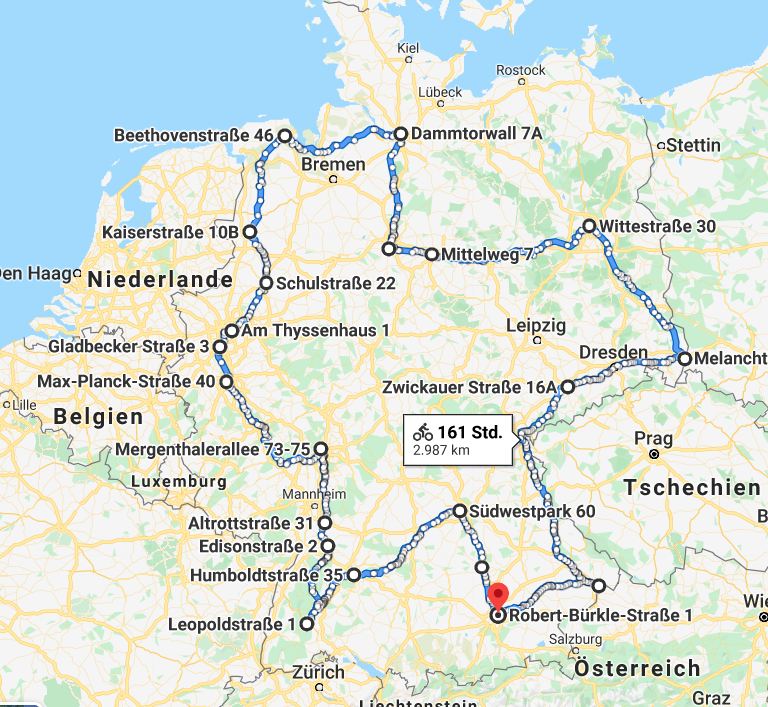